<a class="anchor" id="TOC"></a>
# Table of Contents

>[Table of Contents](#TOC) 

>[1. Introduction](#Introduction)  

>[2. Setup, Import and Read data](#setup)  

>[3. Questions driving the EDA](#que) 

>[4. Exploring Train Dataset](#exp)     
>>[4.1 Summary of Train data](#exp1)   
>>[4.2 Statistics for all the numerical columns](#exp2)    
>>[4.3 Count of Target](#exp3)    

>[5. Visualizations between Target and Predictors](#viz)    
>>[5.1 Target Vs Gender](#viz1)    
>>[5.2 Correlation values for all the predictors with TARGET](#viz2)    
>>[5.3 Top 5 positive and negative correlations to TARGET variable](#viz3)    

>[6. Missing Data](#missing)    
>>[6.1 Dropping columns with missing data](#missing1)    
>>[6.2 Filling the missing values of column 'OWN_CAR_AGE'](#missing2)    
>>[6.3 Columns with no missing columns](#missing3)    
>>[6.4 Separating Categorical and Numerical Data for further processing of missing data](#missing4)    
>>[6.5 Performing Missing Value Imputation](#missing5)    

>[7. Checking Variance for Numerical Data](#variance)  

>[8. Exploratory Data Analysis](#eda)      

>[9. Outliers](#out)  
>>[9.1 Detecting Outliers](#out1)   
>>[9.2 Treatment of Outliers](#out2)   

>[10 Joining Train Data with Transactional Data](#join)    
>>[10.1 Joining Bureau Data with Train Data](#join1)         
   
>[11. Summary](#summary)    


<a class="anchor" id="Introduction"></a>
# 1. Introduction

Home Credit, a financial institution, is dedicated to extending loans to individuals lacking sufficient or non-existent credit histories, aiming to enhance financial inclusivity across diverse markets. To achieve this, they leverage alternative data sources such as telco and transactional records to assess clients' repayment capabilities.Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.

The goal of the Home Credit Default project is to develop a robust predictive model that precisely forecast the probability of the target variable which in turn identifies individuals who are likely to default on loan payments. This model can assist Home Credit in making informed decisions on loan approval reducing the credit default risk.

<a class="anchor" id="setup"></a>
# 2. Setup, Import and Read data

In [208]:
# import statements

import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.patches as mp
import matplotlib.pyplot as plt
import glob
import chardet

In [209]:
TrainDF = pd.read_csv("Home-credit-data/application_train.csv")

In [210]:
TrainDF

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


<a class="anchor" id="que"></a>
# 3. Questions driving the EDA

1. The first and formost question that has to be answered is what is the Target variable
2. Then checking the overall data before actually starting the EDA to know how many columns(variables) present in data along which how many rows(amount of data)
3. What is the majority and minority classes are present in TARGET variable along with the Accuaracy of the majority class
4. Then Visualizing few of the columns to find the most correalted data to the Target varable
5. Then finding the missing data along with how those can be treated with the data already present within the data
6. How the outliers in the data can be dealt
7. Atleast we need to check how the EDA has helped me to recognize the data and analysis

<a class="anchor" id="exp"></a>
# 4. Exploring Train Dataset

<a class="anchor" id="exp1"></a>
## 4.1. Summary of Train data

In [211]:
TrainDF.info

<bound method DataFrame.info of         SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0        

<a class="anchor" id="exp2"></a>
## 4.2. Statistics for all the numerical columns

In [212]:
TrainDF.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


<a class="anchor" id="exp3"></a>
## 4.3. Count of Target 

In [213]:
TrainDF['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

According to the above values we can observe that the majority class is the 0 value and the minority class is the 1 value. Now we can check how each class is contributed in terms of percentages.

In [214]:
(TrainDF['TARGET'].value_counts() / len(TrainDF)) * 100

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

Based on the percentages we can observe that the data present is unbalanced with respect to TARGET variable as there are 91.93% in majority class and only 8.07% in minority class. So the accuracy for a simple model consisting in a majority class classifier is around 0.92 i.e is always the majority class is predicted we would be correct 92% of the times.

In the business sense if we are predicting that all the customers will not default the loan we will be correct 91.93% of times without using any models.

<a class="anchor" id="viz"></a>
# 5. Visualizations between Target and Predictors

<a class="anchor" id="viz1"></a>
## 5.1. Target Vs Gender

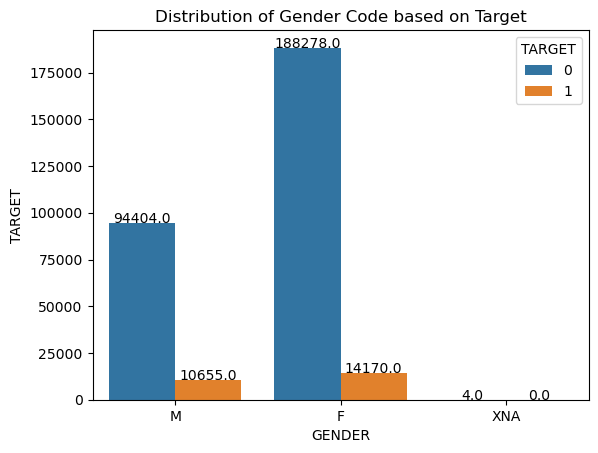

In [215]:
gender = sns.countplot(x='CODE_GENDER', hue='TARGET', data=TrainDF)

for p in gender.patches:
    gender.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2, p.get_height()), ha='center')

plt.title('Distribution of Gender Code based on Target')
plt.xlabel('GENDER')
plt.ylabel('TARGET')

plt.show()

From the above plot we can observe that the data is more on 'Female' gender compared to 'Male' gender. Also it can be observed that the difference in Gender is prominontly less and for Target = 1 rather than for Target = 0. But this can also be contributed to the fact that there is a lot more data on majority class compared to minority class.

<a class="anchor" id="viz2"></a>
## 5.2. Correlation values for all the predictors with TARGET

In [216]:
# Calculate the correlations between the target variable and predictors
correlation_matrix = TrainDF.corr(numeric_only = True)['TARGET'].sort_values(ascending=False)

print(correlation_matrix)

TARGET                         1.000000
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
                                 ...   
FLOORSMAX_AVG                 -0.044003
DAYS_EMPLOYED                 -0.044932
EXT_SOURCE_1                  -0.155317
EXT_SOURCE_2                  -0.160472
EXT_SOURCE_3                  -0.178919
Name: TARGET, Length: 106, dtype: float64


From the above correlation values we can see that the in the Numeric columns, the top 3 variables with strong negative correlation with Target variable are EXT_SOURCE_3, EXT_SOURCE_2 and EXT_SOURCE_1. On the other side the top 3 variables with strong positive correlation with Target variable are DAYS_BIRTH, REGION_RATING_CLIENT_W_CITY and REGION_RATING_CLIENT.


We will visualize these in an heatmap to get a more outlook on this correlation data

<a class="anchor" id="viz3"></a>
## 5.3 Top 5 positive and negative correlations to TARGET variable

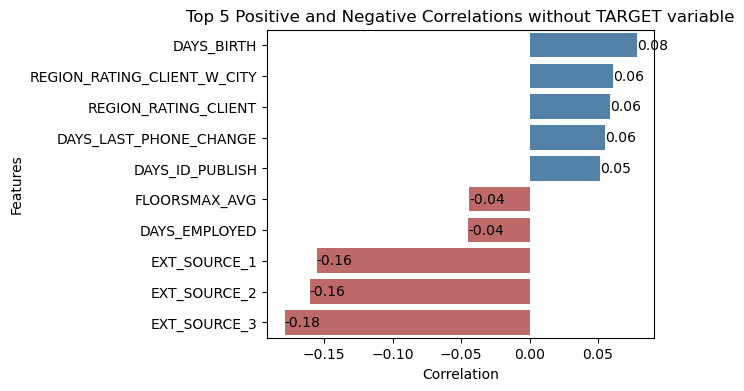

In [217]:
# Visualize the top 10 positive and negative correlations without the target variable
plt.figure(figsize=(5, 4))
top_correlations = pd.concat([correlation_matrix.drop('TARGET').head(5), correlation_matrix.drop('TARGET').tail(5)])
colors = ['indianred' if c < 0 else 'steelblue' for c in top_correlations.values]
sns.barplot(x=top_correlations.values, y=top_correlations.index, palette=colors)
plt.xlabel('Correlation')
plt.ylabel('Features')
plt.title('Top 5 Positive and Negative Correlations without TARGET variable')
for i, v in enumerate(top_correlations.values):
    plt.text(v, i, str(round(v, 2)), va='center')
plt.show()

From the above plot we can see the list of the most correlated variables with Target and can be used in the modelling which are mentioned below

The Top 5 Positive correlation variables are:
*   DAYS_BIRTH
*   REGION_RATING_CLIENT_W_CITY
*   REGION_RATING_CLIENT
*   DAYS_LAST_PHONE_CHANGE
*   DAYS_ID_PUBLISH

The Top 5 Negative correlation variables are:
*   FLOORSMAX_AVG
*   DAYS_EMPLOYED
*   EXT_SOURCE_1
*   EXT_SOURCE_2
*   EXT_SOURCE_3

<a class="anchor" id="missing"></a>
# 6. Missing Data

First we will check the Variable 'CODE_GENDER' based on the visualization above and replace the unknown values(XNA)

In [218]:
TrainDF['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

As it can be observed from the values above above there are 4 missing values these can be replaced with the majority value of 'F' as there will be no impact on the data as this is a large dataset. We can also drop these rows as only 4 rows will not have any impact on the whole dataset. So, I am dropping the rows in this project.

In [219]:
TrainDF.drop(TrainDF[TrainDF['CODE_GENDER'] == 'XNA'].index, inplace = True)

TrainDF.shape

(307507, 122)

Next moving on to find the missing data in the whole Train data

In [220]:
#Total & Percentage of missing data

total = TrainDF.isnull().sum().sort_values(ascending = False)
percent = (TrainDF.isnull().sum()/TrainDF.isnull().count()*100).sort_values(ascending = False)
missing_application_train_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_application_train_data.head(50)

,Total,Percent
COMMONAREA_MEDI,214862,69.872231
COMMONAREA_AVG,214862,69.872231
COMMONAREA_MODE,214862,69.872231
NONLIVINGAPARTMENTS_MODE,213512,69.433216
NONLIVINGAPARTMENTS_AVG,213512,69.433216
NONLIVINGAPARTMENTS_MEDI,213512,69.433216
FONDKAPREMONT_MODE,210293,68.386411
LIVINGAPARTMENTS_MODE,210197,68.355192
LIVINGAPARTMENTS_AVG,210197,68.355192
LIVINGAPARTMENTS_MEDI,210197,68.355192


<a class="anchor" id="missing1"></a>
## 6.1 Dropping columns with missing data

Since there are a total of 122 columns we can drop the columns which give the least information. If there is more than 50% of the data is missing from the column that column doesnot any onsite on Taraget variable so it is better to drop those columns. So first we can check how many and what columns have more than 50% of missing data. 

In [221]:
missing_50per_cols = missing_application_train_data[missing_application_train_data.Percent > 50 ]

print(missing_50per_cols)

                           Total    Percent
COMMONAREA_MEDI           214862  69.872231
COMMONAREA_AVG            214862  69.872231
COMMONAREA_MODE           214862  69.872231
NONLIVINGAPARTMENTS_MODE  213512  69.433216
NONLIVINGAPARTMENTS_AVG   213512  69.433216
NONLIVINGAPARTMENTS_MEDI  213512  69.433216
FONDKAPREMONT_MODE        210293  68.386411
LIVINGAPARTMENTS_MODE     210197  68.355192
LIVINGAPARTMENTS_AVG      210197  68.355192
LIVINGAPARTMENTS_MEDI     210197  68.355192
FLOORSMIN_AVG             208640  67.848862
FLOORSMIN_MODE            208640  67.848862
FLOORSMIN_MEDI            208640  67.848862
YEARS_BUILD_MEDI          204486  66.497998
YEARS_BUILD_MODE          204486  66.497998
YEARS_BUILD_AVG           204486  66.497998
OWN_CAR_AGE               202927  65.991018
LANDAREA_MEDI             182588  59.376860
LANDAREA_MODE             182588  59.376860
LANDAREA_AVG              182588  59.376860
BASEMENTAREA_MEDI         179942  58.516391
BASEMENTAREA_AVG          179942

In [222]:
len(missing_50per_cols)

41

From the above missing columns we can see that the column 'OWN_CAR_AGE' is present but not the variable 'FLAG_OWN_CAR'. So we can check the values of 'OWN_CAR_AGE' seperately. But the other columns doesn't seem to have strong connection with the remaining data so those 40 columns can be droped.

In [223]:
missing_50per_cols_index = list(missing_50per_cols.index)
missing_50per_cols_index.remove("OWN_CAR_AGE")

TrainDF = TrainDF.drop(missing_50per_cols_index, axis =1)
TrainDF.shape

(307507, 82)

<a class="anchor" id="missing2"></a>
## 6.2 Filling the missing values of column 'OWN_CAR_AGE'

First, let's check the values and count of missing and available values in columns 'OWN_CAR_AGE' and 'FLAG_OWN_CAR'

In [224]:
# Count the occurrences of FLAG_OWN_CAR values in the training dataset
Flag_car_counts = TrainDF['FLAG_OWN_CAR'].value_counts()

# Get the count for the missing values in OWN_CAR_AGE column
Missing_car_age = TrainDF['OWN_CAR_AGE'].isnull().sum()

print(Flag_car_counts)
print(Missing_car_age)

N    202922
Y    104585
Name: FLAG_OWN_CAR, dtype: int64
202927


From the above values we can observe that there are no missing values in FLAG_OWN_CAR column but there are 202922 customers doesn't own cars which is very near to 202927 for whom the data is missing for OWN_CAR_AGE column. So for those people the values in column 'OWN_CAR_AGE' will not be present so we can replace missing values with '-1' as the customer who owns car in less than 1 year will have 0 value in that column 

In [225]:
TrainDF['OWN_CAR_AGE'] = TrainDF['OWN_CAR_AGE'].fillna(-1)

TrainDF['OWN_CAR_AGE'].isnull().sum()

0

<a class="anchor" id="missing3"></a>
## 6.3 Columns with no missing columns

In [226]:
No_missing_columns = TrainDF.loc[:, TrainDF.isnull().sum()==0]

print(No_missing_columns.columns)

No_missing_columns.shape

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUME

(307507, 56)

From above we can observe that there are 56 columns ith no missing data and we can also see the names of columns which doesn't contain any missing data.

<a class="anchor" id="missing4"></a>
## 6.4 Separating Categorical and Numerical Data for further processing of missing data

In [227]:
# Differentiating Numerical and Categorical Column

cols = []
for i in list(TrainDF.columns):
  cols.append(i)

num_cols = list(TrainDF._get_numeric_data().columns) #storing numerical cols in num_cols


In [228]:
# number of Numerical Coulmns
len(num_cols)

69

In [229]:
# Separating Categorical Data for Independent Imputation and Outlier Treatment of Numerical Data
cat_cols = list(set(num_cols) ^ set(cols))

In [230]:
# number oof Categorical columns

len(cat_cols)

13

If some numeric data can be moved to categorical data as few of the categories are coded as 0 and 1 like ratings so we need to find that columns and move them to categorical columns from numerical columns also removing 'TARGET' and 'SK_ID_CURR' as they are not required for Impuation

In [231]:
# for the columns with values only 0 and 1 like flags move those columns to categorical

num_cols.remove("SK_ID_CURR")
num_cols.remove("TARGET")

copy_num_cols = num_cols.copy()
for column in copy_num_cols:
    values=list(TrainDF[column].unique())
    if len(values)==2 and 1.0 in values and 0.0 in values:
      cat_cols.append(column)
      num_cols.remove(column)

len(num_cols)

35

In [232]:
len(cat_cols)

45

In [233]:
print(TrainDF['REGION_RATING_CLIENT'].unique())
print(TrainDF['REGION_RATING_CLIENT_W_CITY'].unique())

[2 1 3]
[2 1 3]


Since there are only 3 values in the columns 'REGION_RATING_CLIENT' and 'REGION_RATING_CLIENT_W_CITY' we can treat them as categorical data and can be removed from numerical data

In [234]:
cat_cols.append('REGION_RATING_CLIENT')
num_cols.remove('REGION_RATING_CLIENT')

cat_cols.append('REGION_RATING_CLIENT_W_CITY')
num_cols.remove('REGION_RATING_CLIENT_W_CITY')


In [235]:
# Creating DFs for numerical and categorical data seperatly

cat_df = TrainDF[cat_cols]
num_df = TrainDF[num_cols]

In [236]:
na = cat_df.isna().sum()
na[na>0]

OCCUPATION_TYPE         96389
EMERGENCYSTATE_MODE    145754
NAME_TYPE_SUITE          1292
dtype: int64

In [237]:
# Checking the number of null values in numerical columns

In [238]:
nulls = num_df.isnull().sum()
nulls[nulls> 0]


AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
CNT_FAM_MEMBERS                      2
EXT_SOURCE_2                       660
EXT_SOURCE_3                     60965
YEARS_BEGINEXPLUATATION_AVG     150006
FLOORSMAX_AVG                   153019
YEARS_BEGINEXPLUATATION_MODE    150006
FLOORSMAX_MODE                  153019
YEARS_BEGINEXPLUATATION_MEDI    150006
FLOORSMAX_MEDI                  153019
TOTALAREA_MODE                  148430
OBS_30_CNT_SOCIAL_CIRCLE          1021
DEF_30_CNT_SOCIAL_CIRCLE          1021
OBS_60_CNT_SOCIAL_CIRCLE          1021
DEF_60_CNT_SOCIAL_CIRCLE          1021
DAYS_LAST_PHONE_CHANGE               1
AMT_REQ_CREDIT_BUREAU_HOUR       41519
AMT_REQ_CREDIT_BUREAU_DAY        41519
AMT_REQ_CREDIT_BUREAU_WEEK       41519
AMT_REQ_CREDIT_BUREAU_MON        41519
AMT_REQ_CREDIT_BUREAU_QRT        41519
AMT_REQ_CREDIT_BUREAU_YEAR       41519
dtype: int64

<a class="anchor" id="missing5"></a>
## 6.5 Performing Missing Value Imputation

In [239]:
# Applying Median Imputation for Numerical Data and
# Mode (Most Frequent) Imputation for Categorical Data due to Skewed Distribution

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')  # use 'median' for skewed data
TrainDF[num_cols] = imputer.fit_transform(TrainDF[num_cols])

imputer = SimpleImputer(strategy='most_frequent')  # use 'mode' for skewed data
TrainDF[cat_cols] = imputer.fit_transform(TrainDF[cat_cols])

<a class="anchor" id="variance"></a>
# 7. Checking Variance for Numerical Data

In [240]:
num_df.var()

CNT_CHILDREN                    5.214557e-01
AMT_INCOME_TOTAL                5.622809e+10
AMT_CREDIT                      1.620003e+11
AMT_ANNUITY                     2.100702e+08
AMT_GOODS_PRICE                 1.364913e+11
REGION_POPULATION_RELATIVE      1.913053e-04
DAYS_BIRTH                      1.904434e+07
DAYS_EMPLOYED                   1.995904e+10
DAYS_REGISTRATION               1.241070e+07
DAYS_ID_PUBLISH                 2.278453e+06
OWN_CAR_AGE                     8.681015e+01
CNT_FAM_MEMBERS                 8.293381e-01
HOUR_APPR_PROCESS_START         1.066568e+01
EXT_SOURCE_2                    3.650404e-02
EXT_SOURCE_3                    3.796392e-02
YEARS_BEGINEXPLUATATION_AVG     3.507466e-03
FLOORSMAX_AVG                   2.092096e-02
YEARS_BEGINEXPLUATATION_MODE    4.170065e-03
FLOORSMAX_MODE                  2.065244e-02
YEARS_BEGINEXPLUATATION_MEDI    3.587755e-03
FLOORSMAX_MEDI                  2.104448e-02
TOTALAREA_MODE                  1.154827e-02
OBS_30_CNT

There are no columns that are very near to 0 varience, but there are few which are near to 1 in terms of varience that means that those cloumns are mostly constant values are have very less variance that will not provide much information regading the Target varable so will not have much use in Analysis while creating the model.

<a class="anchor" id="eda"></a>
# 8. Exploratory Data Analysis

Let us explore some of the variables more to find the relation of that varable with the Target Variable

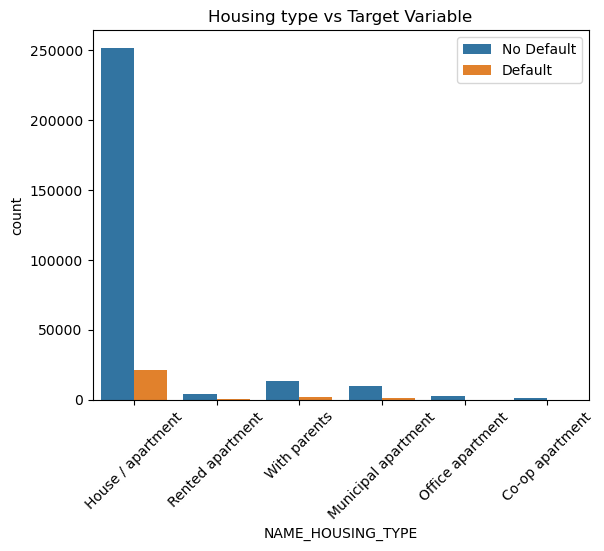

In [241]:
# Visualization between Housing type and the Target Variable

sns.countplot(x='NAME_HOUSING_TYPE', hue='TARGET', data=TrainDF)
plt.title("Housing type vs Target Variable")
plt.xticks(rotation = 45)
plt.legend(labels = ['No Default', 'Default'])
plt.show()

From the above plot, we can analize that the individuals who own House/apartment has more chance of paying back the loan than the other categories.

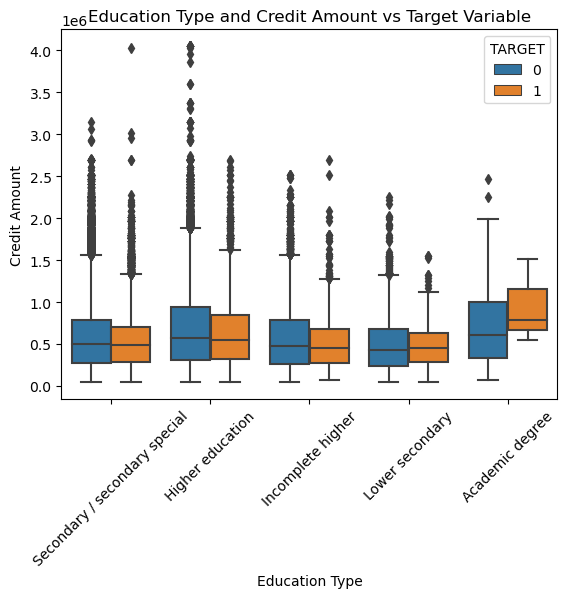

In [242]:
# Visualization between Education Type and Credit Amount vs Target Variable

sns.boxplot(x='NAME_EDUCATION_TYPE', y='AMT_CREDIT', hue='TARGET', data=TrainDF)

plt.title("Education Type and Credit Amount vs Target Variable")
plt.xlabel("Education Type")
plt.ylabel("Credit Amount")
plt.xticks(rotation = 45)
plt.show()

From the above plot we can find that the Education type has a lot of effect on the clients behaviour towards the repayment of the loan so this is one of the a main factor for the analysis

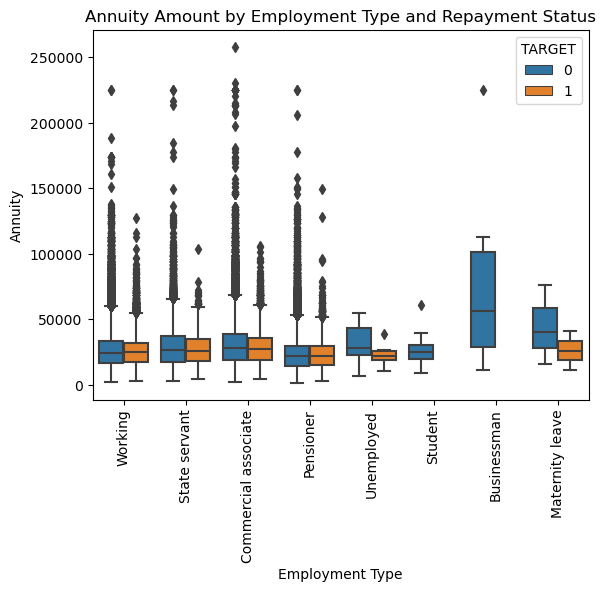

In [243]:
# Visualization between Income Type and Loan Taken with the Target Varibale

sns.boxplot(x='NAME_INCOME_TYPE', y='AMT_ANNUITY', hue='TARGET', data=TrainDF)


plt.title('Annuity Amount by Employment Type and Repayment Status')
plt.xlabel('Employment Type')
plt.ylabel('Annuity')
plt.xticks(rotation=90)

plt.show()

From the above plot we can see that Businessmans and the students  will repay the loan without default where as the other categories has varying levels of repayment so these variables can be considered for further analysis

Still there are other important variables which can be considered like the FLAG_OWN_CAR and OWN_CAR_AGE which we have previously discussed in the missing data section. 

Further more Analysis on the data can be done when actual modelling is started and more information is collected from the model. 

<a class="anchor" id="out"></a>
# 9. Outliers

<a class="anchor" id="out1"></a>
## 9.1 Detecting Outliers

As we can find from above box plots there lot of outliers present in the data. We Can find the presence of Outliers in the numerical columns by using the Kurtosis method. A high kurtosis value indicates the presence of high tailed distribution.

In [244]:
kurtosis_values = num_df.kurtosis()

for column in num_df.columns:
    print(f"Kurtosis of column {column}: {kurtosis_values[column]}")

Kurtosis of column CNT_CHILDREN: 7.904369015326672
Kurtosis of column AMT_INCOME_TOTAL: 191784.25918688532
Kurtosis of column AMT_CREDIT: 1.9339822296152818
Kurtosis of column AMT_ANNUITY: 7.707235274219133
Kurtosis of column AMT_GOODS_PRICE: 2.431912179837508
Kurtosis of column REGION_POPULATION_RELATIVE: 3.260125593923247
Kurtosis of column DAYS_BIRTH: -1.0491182413755826
Kurtosis of column DAYS_EMPLOYED: 0.7715437198229642
Kurtosis of column DAYS_REGISTRATION: -0.3213352106995022
Kurtosis of column DAYS_ID_PUBLISH: -1.1068116373741452
Kurtosis of column OWN_CAR_AGE: 18.654810366652303
Kurtosis of column CNT_FAM_MEMBERS: 2.802067777133301
Kurtosis of column HOUR_APPR_PROCESS_START: -0.19415855313825547
Kurtosis of column EXT_SOURCE_2: -0.26912989224059647
Kurtosis of column EXT_SOURCE_3: -0.6634517795861177
Kurtosis of column YEARS_BEGINEXPLUATATION_AVG: 248.17171499805875
Kurtosis of column FLOORSMAX_AVG: 2.432526325060468
Kurtosis of column YEARS_BEGINEXPLUATATION_MODE: 219.9586303

<a class="anchor" id="out2"></a>
## 9.2 Treatment of Outliers

We addressed outliers in the dataset using the Winsorization method. We used Winsorization method because it preserves the overall shape and distribution of the data while reducing the impact of outliers.  Winsorization involves replacing extreme values with less extreme but still reasonable values. The approach entails setting a threshold or percentile, such as the 95th or 99th percentile, and capping or flooring the data at that point.

In [245]:
from scipy.stats.mstats import winsorize
for column in num_df.columns:
    TrainDF[column] = winsorize(TrainDF[column], limits=[0.05, 0.05])

<a class="anchor" id="join"></a>
# 10. Joining Train Data with Transactional Data

First we will read the trasactional data and then join both the train and transactional data

In [246]:
BureauDF = pd.read_csv("Home-credit-data/bureau.csv")

BureauDF.shape

(1716428, 17)

In [247]:
BureauDF.head(5)

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [248]:
# Information about the data types of the columns
print(BureauDF.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB
None


In [249]:
# Displaying the number of missing values in each column
print(BureauDF.isnull().sum())

SK_ID_CURR                      0
SK_ID_BUREAU                    0
CREDIT_ACTIVE                   0
CREDIT_CURRENCY                 0
DAYS_CREDIT                     0
CREDIT_DAY_OVERDUE              0
DAYS_CREDIT_ENDDATE        105553
DAYS_ENDDATE_FACT          633653
AMT_CREDIT_MAX_OVERDUE    1124488
CNT_CREDIT_PROLONG              0
AMT_CREDIT_SUM                 13
AMT_CREDIT_SUM_DEBT        257669
AMT_CREDIT_SUM_LIMIT       591780
AMT_CREDIT_SUM_OVERDUE          0
CREDIT_TYPE                     0
DAYS_CREDIT_UPDATE              0
AMT_ANNUITY               1226791
dtype: int64


<a class="anchor" id="join1"></a>
## 10.1 Joining Bureau Data with Train Data

In [250]:
# Joining the data
train_bureauDF = TrainDF.merge(BureauDF, on='SK_ID_CURR',how = 'left')

# Displaying the first 5 rows
train_bureauDF.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY_x,...,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY_y
0,100002,1,Cash loans,M,N,Y,0.0,202500.0,406597.5,24700.5,...,-1038.0,NaN,0.0,40761.0,NaN,NaN,0.0,Credit card,-1038.0,0.0
1,100002,1,Cash loans,M,N,Y,0.0,202500.0,406597.5,24700.5,...,-48.0,NaN,0.0,0.0,0.0,NaN,0.0,Credit card,-47.0,NaN
2,100002,1,Cash loans,M,N,Y,0.0,202500.0,406597.5,24700.5,...,-1185.0,0.000,0.0,135000.0,0.0,0.0,0.0,Consumer credit,-1185.0,0.0
3,100002,1,Cash loans,M,N,Y,0.0,202500.0,406597.5,24700.5,...,-911.0,3321.000,0.0,19071.0,NaN,NaN,0.0,Consumer credit,-906.0,0.0
4,100002,1,Cash loans,M,N,Y,0.0,202500.0,406597.5,24700.5,...,-36.0,5043.645,0.0,120735.0,0.0,0.0,0.0,Consumer credit,-34.0,0.0


<a class="anchor" id="summary"></a>
# 11. Summary

Based on the comprehensive exploratory data analysis (EDA) conducted, several key observations have emerged. One important insight is the strategy to refine both the training and test datasets by eliminating columns with over 50% missing data in the training dataset. This step is crucial because variables with significant missing data can distort model training and result in inaccurate predictions of the target variable.

Additionally, the analysis successfully identified outliers within the numerical data, leveraging kurtosis values, and subsequently, these outliers were addressed through the application of the Winsorization method. This approach retains the overall data distribution while mitigating the influence of outliers.

Considering the nature of the business problem, which involves supervised learning with a binary target variable, it is advisable to employ models such as Logistic Regression and Random Forest on the refined training dataset.

Furthermore, the analysis highlighted certain variables, such as Education Type, Employment Type, and Housing Type, as having a substantial impact on the target variable. Additionally, a correlation matrix revealed six other factors strongly related to the target variable, indicating their suitability for inclusion in the modeling process.